In [4]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "/home/Ront/Documentos/Card-13/PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [5]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


# Activity
Modify the test data to create an alternate universe where everyone I hire everyone I normally wouldn't have, and vice versa. Compare the resulting decison tree to the one from the orignal data.

In [12]:
# Cria a lista de features
features = list(df.columns[:6])  # Adicione esta linha!

# Cria uma cópia dos dados originais
df_invertido = df.copy()

# Inverte os valores de Hired (0 vira 1, 1 vira 0)
df_invertido['Hired'] = 1 - df_invertido['Hired']

# Mostra como ficou
print(df_invertido.head())

   Years Experience  Employed?  Previous employers  Level of Education  \
0                10          1                   4                   0   
1                 0          0                   0                   0   
2                 7          0                   6                   0   
3                 2          1                   1                   1   
4                20          0                   2                   2   

   Top-tier school  Interned  Hired  
0                0         0      0  
1                1         1      0  
2                0         0      1  
3                1         0      0  
4                1         0      1  


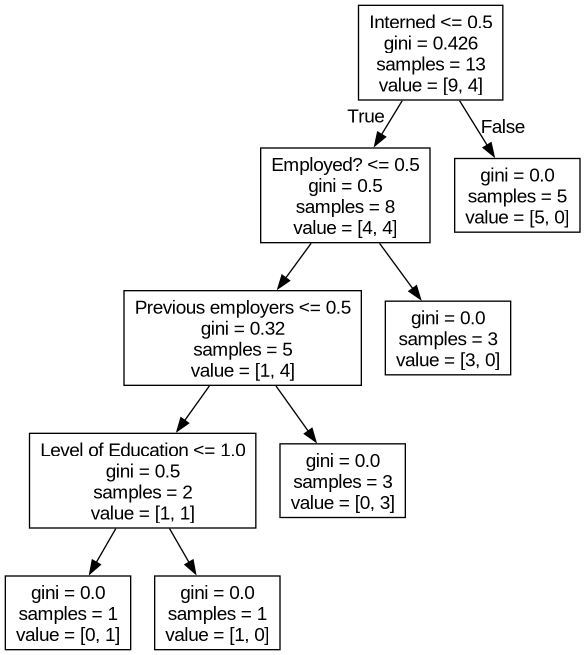

In [13]:
# Treina uma nova árvore de decisão com os dados invertidos
y_invertido = df_invertido["Hired"]
X_invertido = df_invertido[features]

clf_invertido = tree.DecisionTreeClassifier()
clf_invertido = clf_invertido.fit(X_invertido, y_invertido)

# Visualiza a nova árvore de decisão
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf_invertido, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())